# ML Pipeline

As Data Scientist, we just have to Machine Learning models. We sit down, think about a problem in the world, how to solve it using Machine Learning or any kind of Artificial Intelligence and then just do it.  

Obviusly no one belived what I just said. We now that the data science world is about data, and most of our time will be dedicated to clean and treat data. The models are just the last part. That is why we have to design reusable ML pipelines, which ensures that the data will be treated always in the same manner and will produce the same result. 

![Anaconda_1.png](Anaconda_1.png)

In this notebook we are going to take a look at a ML Pipeline, but mostly at the data cleaning and preprocessing part.

![Data Centric AI](data-centric-ai.png)

### Now, our dataset! Today will be all about penguins!

![](https://camo.githubusercontent.com/1d187452ac3929cfde8f5760b79f37cc117c1a332227d37a8c50db50d3db632a/68747470733a2f2f616c6c69736f6e686f7273742e6769746875622e696f2f70616c6d657270656e6775696e732f7265666572656e63652f666967757265732f6c7465725f70656e6775696e732e706e67)

In [2]:
%pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins_raw,load_penguins
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
sns.set_style('whitegrid')

In [4]:
#loads the penguins dataset from the palmerpenguins package into a Pandas DataFrame object called penguins_raw.
penguins_raw = load_penguins_raw() #function provided by the palmerpenguins package that returns the raw penguin data in a Pandas DataFrame.

#Display the first 5 rows of the DataFrame
penguins_raw.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


## A little bit of Data Exploration

Display the last 5 rows of the DataFrame:

In [5]:
penguins_raw.tail()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN
343,PAL0910,68,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A2,Yes,2009-11-21,50.2,18.7,198.0,3775.0,FEMALE,9.39305,-24.25255,NaN


We can begin with some data exploration, to check what kind of information we have, the types, the missing values, what classes do we have, etc.

Check how many penguins do we have per species:

In [6]:
penguins_raw['Species'].value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

Do all penguins belonging to the same species come from the same island ?

In [7]:
#Group the data by species and island, count the number of unique islands for each species
islands_per_species = penguins_raw.groupby(['Species'])['Island'].nunique()
print(islands_per_species)

Species
Adelie Penguin (Pygoscelis adeliae)          3
Chinstrap penguin (Pygoscelis antarctica)    1
Gentoo penguin (Pygoscelis papua)            1
Name: Island, dtype: int64


In [8]:
# Group the data by penguin species and get a list of unique islands for each group
islands_per_penguin = penguins_raw.groupby('Species')['Island'].unique()
print(islands_per_penguin)

Species
Adelie Penguin (Pygoscelis adeliae)          [Torgersen, Biscoe, Dream]
Chinstrap penguin (Pygoscelis antarctica)                       [Dream]
Gentoo penguin (Pygoscelis papua)                              [Biscoe]
Name: Island, dtype: object


###### Answer: No. I group the data by species and island and count the number of unique islands for each species. Since the number of unique islands is greater than one, then not all penguins of that species come from the same island.

What kind of data do we have in the dataset?

In [9]:
# Get the data types of each column in the DataFrame
data_types = penguins_raw.dtypes
# Print the data types
print(data_types)

studyName               object
Sample Number            int64
Species                 object
Region                  object
Island                  object
Stage                   object
Individual ID           object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Comments                object
dtype: object


In [10]:
#To count how many times each type of data appears in the DataFrame
count_data_types_columns = penguins_raw.dtypes.value_counts()
print(count_data_types_columns)

object     10
float64     6
int64       1
dtype: int64


What kind of projects can be done with this dataset?

###### - We can build a classification model to predict the species of a penguin based on its characteristics (such as body measurements, flipper length, and sex).
###### - Since there are information on the timing of penguin observations, we can used it to explore changes in penguin populations over time.

## Data Cleaning

Check which attributes have missing values.

There are multiple ways for dealing with missing values.
- Drop the rows that contain missing values
- Imputation: Filling in the missing values
- Model-based procedures
- Weighting

Droping the rows that contain missing values is ok, if the data that is missing is completly at random and there are not that many missing rows. But when data is not missing at random and we drop those rows, we biased the dataset, thus, the results.  
Imputation usually uses some statistical method, like the mean for numerical columns or the mode for catogorical columns. This will reduce the variability of the attribute.   
Using models and predictions for filling those values may work poorly if the data must be extrapolated.  
Weighting refers to fill with a value, that takes into account the group and the sample distribution. We take into account that our dataset has more rows from the group X than the group Y, it is unbalanced. So we weight the points, so we have a better data point, according to the group.

One key aspect is to be careful, so that our results are not just artifacts caused by our imputation. 

Can you name any case where the missing values are useful?

If we are looking to clean the data, we have to check both rows and columns. The order depends on the dataset and the context, but we usually drop first the columns that are not relevant to our analysis, and then drop the rows that contain missing values. The reasoning is that if we do that in the other way around, we might drop missing rows that do not contain information in an attribute that does not matter, then we would lose information.

One way we can tell that one column does not add information is when the whole column just have a constant value, which does not add anything for predictions. Another one is they are identifiers, each value is different, but they do not tell us anything or do no have any pattern. 

### Categorical to numeric

Most models work with quantitative data. They cannot accept a category or a label for the training. We can do two things, transform the categories with one hot enconding or to a representation, giving a number to each category. The second option is not advisable, since the assigned value given to each category is just a representation, but in numbers, it can imply order or magnitude. For example, if I say that "dog" is 5 and "cat" is 0, does that mean that dog is better than cat? It has a higher value. What if our model learns that? On the other hand, if we use "dog" as 1 and "cat" as 0, but as the labels of the predicted variable, then we are good. 
One-hot-encoding will create n columns, one for each category, and it will have the value of 1 or 0 if the row has that attribute or not. As the model creates n columns, we can discard one of them, since it is the complement of the others and therefore, does not add any new information.

Get just the year from the date:

In [11]:
#First I check the format for the column 'Data Egg'
penguins_raw['Date Egg'].dtype

dtype('O')

In [12]:
#Convert the 'Date Egg' column to datetime format
penguins_raw['Date Egg'] = pd.to_datetime(penguins_raw['Date Egg'])
#Create a new column named 'year' in the penguins_raw dataset.
penguins_raw['year'] = penguins_raw['Date Egg'].dt.year #Extract the year from the 'Date Egg' column
print(penguins_raw['year'])

0      2007
1      2007
2      2007
3      2007
4      2007
       ... 
339    2009
340    2009
341    2009
342    2009
343    2009
Name: year, Length: 344, dtype: int64


We have 17 columns on the data set. Eliminate the columns that do not add any relevant information. 

###### Check what data each column brings me:

###### studyName: Indicates the name of the study in which the data was collected.
###### Sample Number: Sample number for the identified individual
###### Species: Indicates the species of the penguin.                
###### Region: Indicates the region on which the data was collected.                            
###### Island: Indicates the island on which the data was collected.                   
###### Stage: Indicates the life stage of the penguin (adult or young).                    
###### Individual ID: Unique identifier for each penguin            
###### Clutch Completion: Indicates if egg laying in the nest is complete.        
###### Date Egg: The date the egg was laid in the nest.                 
###### Culmen Length (mm): Indicates the length of the penguin's beak.   
###### Culmen Depth (mm): Indicates the depth of the penguin's beak.      
###### Flipper Length (mm): Indicates the length of the penguin's flipper.   
###### Body Mass (g): Indicates the body mass of the penguin.            
###### Sex: Indicates the penguin's gender.
###### Delta 15 N (o/oo): This is the value of the isotopic ratio of nitrogen-15 to nitrogen-14 in penguin tissue. It's a measure of the penguin's trophic location in the food chain. Higher values indicate that the penguin is feeding at a higher trophic level.       
###### Delta 13 C (o/oo): This is the value of the isotopic ratio of carbon-13 to carbon-12 in penguin tissue. It's a measure of the penguin's food source. Lower values indicate that the penguin feeds on prey that uses photosynthesis, such as phytoplankton, while higher values indicate that the penguin feeds on prey that does not use photosynthesis, such as krill.      
###### Comments: Contains additional commentary on the penguin.               
###### year: Indicates the year on which the data was collected.         


In [13]:
#First identify missing values
missing_values = penguins_raw.isnull().sum()
print(missing_values)

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     11
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               290
year                     0
dtype: int64


In [14]:
# Calculate the percentage of missing values in each column
missing_percent = penguins_raw.isnull().mean() * 100
print(missing_percent)

studyName               0.000000
Sample Number           0.000000
Species                 0.000000
Region                  0.000000
Island                  0.000000
Stage                   0.000000
Individual ID           0.000000
Clutch Completion       0.000000
Date Egg                0.000000
Culmen Length (mm)      0.581395
Culmen Depth (mm)       0.581395
Flipper Length (mm)     0.581395
Body Mass (g)           0.581395
Sex                     3.197674
Delta 15 N (o/oo)       4.069767
Delta 13 C (o/oo)       3.779070
Comments               84.302326
year                    0.000000
dtype: float64


In [15]:
#Create a list with the names of the columns that I want to drop
drop_columns=['Sample Number','Date Egg','studyName','Comments','Individual ID']
#Drop the columns from the list using the method drop()
penguins_raw=penguins_raw.drop(labels=drop_columns, axis=1) #axis=1 indicates that is to drop columns
#To see the first 5 rows for my new dataframe
penguins_raw.head()

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),year
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,2007
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,2007
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,2007
3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,2007


Check the rows with missing values:

In [16]:
#Check the missing values in each row
rows_with_null = penguins_raw.isnull().any(axis=1)
number_rows_with_null = rows_with_null.sum()

#Print the number of rows with null values and their indices
print(f"There are {number_rows_with_null} rows with missing values :")
print(penguins_raw[rows_with_null].index)

There are 20 rows with missing values :
Int64Index([  0,   3,   8,   9,  10,  11,  12,  13,  15,  39,  41,  46,  47,
            178, 182, 218, 256, 268, 271, 336],
           dtype='int64')


In [17]:
#New DataFrame with just the rows that have missing values from the original DataFrame
penguins_null = penguins_raw.loc[rows_with_null]
#Print the DataFrame with the rows with null values
print(penguins_null)

                                       Species  Region     Island  \
0          Adelie Penguin (Pygoscelis adeliae)  Anvers  Torgersen   
3          Adelie Penguin (Pygoscelis adeliae)  Anvers  Torgersen   
8          Adelie Penguin (Pygoscelis adeliae)  Anvers  Torgersen   
9          Adelie Penguin (Pygoscelis adeliae)  Anvers  Torgersen   
10         Adelie Penguin (Pygoscelis adeliae)  Anvers  Torgersen   
11         Adelie Penguin (Pygoscelis adeliae)  Anvers  Torgersen   
12         Adelie Penguin (Pygoscelis adeliae)  Anvers  Torgersen   
13         Adelie Penguin (Pygoscelis adeliae)  Anvers  Torgersen   
15         Adelie Penguin (Pygoscelis adeliae)  Anvers  Torgersen   
39         Adelie Penguin (Pygoscelis adeliae)  Anvers      Dream   
41         Adelie Penguin (Pygoscelis adeliae)  Anvers      Dream   
46         Adelie Penguin (Pygoscelis adeliae)  Anvers      Dream   
47         Adelie Penguin (Pygoscelis adeliae)  Anvers      Dream   
178          Gentoo penguin (Pygos

Deal with the missing data. Check how many records do you have that are missing some information, and select a strategy.

In [18]:
#Count the number of missing values per column
missing_counts = penguins_raw.isnull().sum()
#Print the number of missing values in each column 
print('Missing values:')
print(missing_counts)

Missing values:
Species                 0
Region                  0
Island                  0
Stage                   0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    11
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
year                    0
dtype: int64


In [19]:
#Count the number of records with missing values
n_missing_records = penguins_raw.isnull().any(axis=1).sum()
print('Number of records with missing values:', n_missing_records)

Number of records with missing values: 20


In [20]:
#To display in the dataframe only the rows where it has null values in the mentioned columns
penguins_raw[penguins_raw[['Body Mass (g)','Flipper Length (mm)','Culmen Depth (mm)','Culmen Length (mm)','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Sex']].isnull().any(axis=1)]

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),year
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,2007
3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,34.1,18.1,193.0,3475.0,NaN,NaN,NaN,2007
9,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,42.0,20.2,190.0,4250.0,NaN,9.13362,-25.09368,2007
10,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,37.8,17.1,186.0,3300.0,NaN,8.63243,-25.21315,2007
11,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,37.8,17.3,180.0,3700.0,NaN,NaN,NaN,2007
12,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,41.1,17.6,182.0,3200.0,FEMALE,NaN,NaN,2007
13,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,38.6,21.2,191.0,3800.0,MALE,NaN,NaN,2007
15,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,36.6,17.8,185.0,3700.0,FEMALE,NaN,NaN,2007
39,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",No,39.8,19.1,184.0,4650.0,MALE,NaN,NaN,2007


In [21]:
#To check the amount of rows in the dataframe before removing the rows with empty values
penguins_raw.shape[0]

344

In [22]:
#To drop the rows with empty values
penguins_raw = penguins_raw.dropna()

In [23]:
##To check the amount of rows in the dataframe after removing the rows with empty values
penguins_raw.shape[0]

324

Check again that there are no missing values in the dataset.

In [24]:
# Count the number of missing values per column
missing_counts = penguins_raw.isnull().sum()

# Print the number of missing values
print('Missing values:')
print(missing_counts)

# Count the number of records with missing values
n_missing_records = penguins_raw.isnull().any(axis=1).sum()
print('Number of records with missing values:', n_missing_records)


Missing values:
Species                0
Region                 0
Island                 0
Stage                  0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
year                   0
dtype: int64
Number of records with missing values: 0


Use one-hot-encoding for the sex column. How many columns do you need?
Use pandas .get_dummies()

In [25]:
penguins_raw = pd.get_dummies(penguins_raw, columns=['Sex']) #Creates dummy(binary) variables from the 'Sex' column of the DataFrame
#Check the results (Sex_FEMALE & Sex_MALE)
penguins_raw.head()

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),year,Sex_FEMALE,Sex_MALE
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.5,17.4,186.0,3800.0,8.94956,-24.69454,2007,1,0
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,40.3,18.0,195.0,3250.0,8.36821,-25.33302,2007,1,0
4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,36.7,19.3,193.0,3450.0,8.76651,-25.32426,2007,1,0
5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.3,20.6,190.0,3650.0,8.66496,-25.29805,2007,0,1
6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",No,38.9,17.8,181.0,3625.0,9.18718,-25.21799,2007,1,0


## Data Exploration

Great! We have our dataset ready. We already eliminate non-informative columns and fill the missing values. Now we can explore more about the data. One important way of exploring it is through visualizations.


Plot some variables or attributes agains each other, what can you tell from that? You can use seaborns pairplot

###### - Here I want to see the relationship between the size of the penguin's beak and each species.

X-axis shows the peak size in millimeters('culmen_length_mm')
Y-axis shows the peak depth in millimeters('culmen_depth_mm')


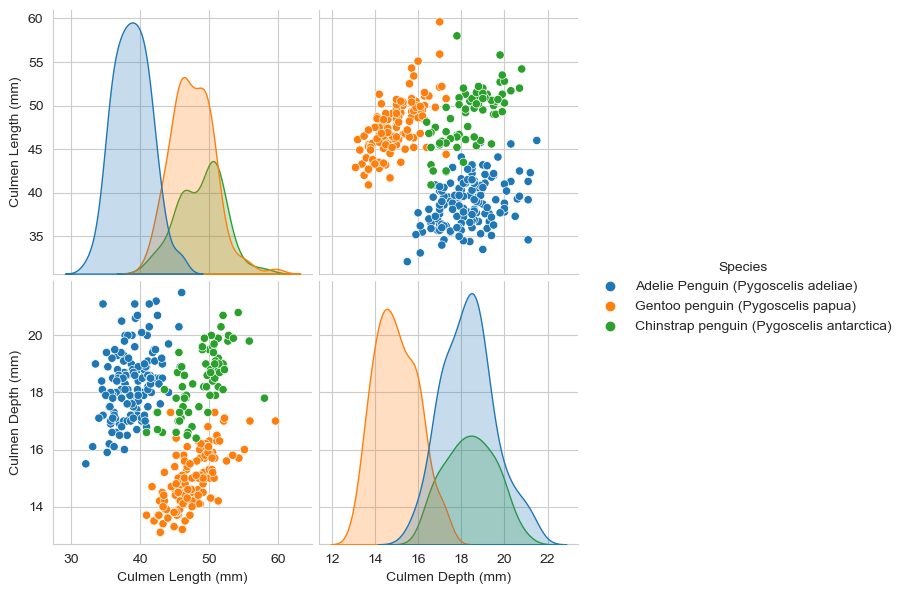

In [26]:
#Select relevant columns
penguins_data = penguins_raw[['Species','Culmen Length (mm)', 'Culmen Depth (mm)']]

#Create pairplot
print("X-axis shows the peak size in millimeters('culmen_length_mm')")
print("Y-axis shows the peak depth in millimeters('culmen_depth_mm')")
sns.pairplot(penguins_data, hue='Species', height=3)

###### Answer: From this pairplot I can say that the size of the beak of penguins does vary between each species and there are notable differences.

In [27]:
sns.pairplot(penguins_raw)

## PCA

Principal Component Analysis is a technique for dimensionality reduction. It is useful for reducing the size of a dataset. It is important since we want to optimize time and processing, but without the loss of relevant information.  
It will compute a number of new components, that explain the variability of the dataset. It is worth mentioning that the resulting components are not columns from the previous dataset, and we do not know which one they represent.  
It is unsupervised, which means that PCA does not need the target variable. It will also help us visualize data, given by our inability to comprehend high dimensional spaces. Then, we can reduce the dimensions to 2 or 3, which we can plot and understand. This last part usually only works for visualization, having just two components from a high dimensional dataset might not explain the variance.

In the previous plot, we had 4 or 5 plots, depending on your column selection. How many plots are comparing two attributes? Now imagine we have 10, 20 attributes, it is no longer feasable. The, we can do PCA to have a lower dimensional data, that still explains the original one.  

PCA tries to find the components were the observations vary the most. Each component will be linear combination of the features, with some weights learned, pretty much like a linear regression. The weights must add to 1, so that we can limit their scale. At the end, it is an optimization problem of finding those weights for each component. As all of them have the same optimization problem, all of them would result in the same vector or component. We can solve this by adding another constraint to the model, we want the components to be uncorrelated. 

There is just one problem. As many other unsupervised methods, the PCA needs a K hyperparameter. It tells the model how many components create. With a low K, we might end-up missing a lot of information, and with a large k, close to n (number of attributes), then we are not reducing enough the dimensionality. So, how can we determine that K? We can plot the explained variance for each possible k between 1 and n, and select the best k. Again, selecting the best k depends on the context. Usually we select the k were 99% percent of the variance is explained, without being to large. 

So we will have two metrics. The Proportion of Variance Explained (PVE) and the Cumulative Variance Explained.

In [28]:
from sklearn.decomposition import PCA

In [29]:
penguins_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 1 to 343
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              324 non-null    object 
 1   Region               324 non-null    object 
 2   Island               324 non-null    object 
 3   Stage                324 non-null    object 
 4   Clutch Completion    324 non-null    object 
 5   Culmen Length (mm)   324 non-null    float64
 6   Culmen Depth (mm)    324 non-null    float64
 7   Flipper Length (mm)  324 non-null    float64
 8   Body Mass (g)        324 non-null    float64
 9   Delta 15 N (o/oo)    324 non-null    float64
 10  Delta 13 C (o/oo)    324 non-null    float64
 11  year                 324 non-null    int64  
 12  Sex_FEMALE           324 non-null    uint8  
 13  Sex_MALE             324 non-null    uint8  
dtypes: float64(6), int64(1), object(5), uint8(2)
memory usage: 41.6+ KB


In [30]:
penguins_num = penguins_raw.select_dtypes(['float64'])

In [31]:
penguins_raw['Species'].astype('category')

1            Adelie Penguin (Pygoscelis adeliae)
2            Adelie Penguin (Pygoscelis adeliae)
4            Adelie Penguin (Pygoscelis adeliae)
5            Adelie Penguin (Pygoscelis adeliae)
6            Adelie Penguin (Pygoscelis adeliae)
                         ...                    
339    Chinstrap penguin (Pygoscelis antarctica)
340    Chinstrap penguin (Pygoscelis antarctica)
341    Chinstrap penguin (Pygoscelis antarctica)
342    Chinstrap penguin (Pygoscelis antarctica)
343    Chinstrap penguin (Pygoscelis antarctica)
Name: Species, Length: 324, dtype: category
Categories (3, object): ['Adelie Penguin (Pygoscelis adeliae)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Gentoo penguin (Pygoscelis papua)']

In [32]:
colors = penguins_raw['Species'].astype('category').cat.codes.map({0:'orange',1:'violet',2:'blue'})

In [33]:
colors

1      orange
2      orange
4      orange
5      orange
6      orange
        ...  
339    violet
340    violet
341    violet
342    violet
343    violet
Length: 324, dtype: object

In [34]:
c = penguins_raw['Species'].astype('category').cat.codes
colors  = [f"C{i}" for i in np.arange(0, c.max()+1)]
cmap, norm = matplotlib.colors.from_levels_and_colors(np.arange(0, c.max()+2), colors)

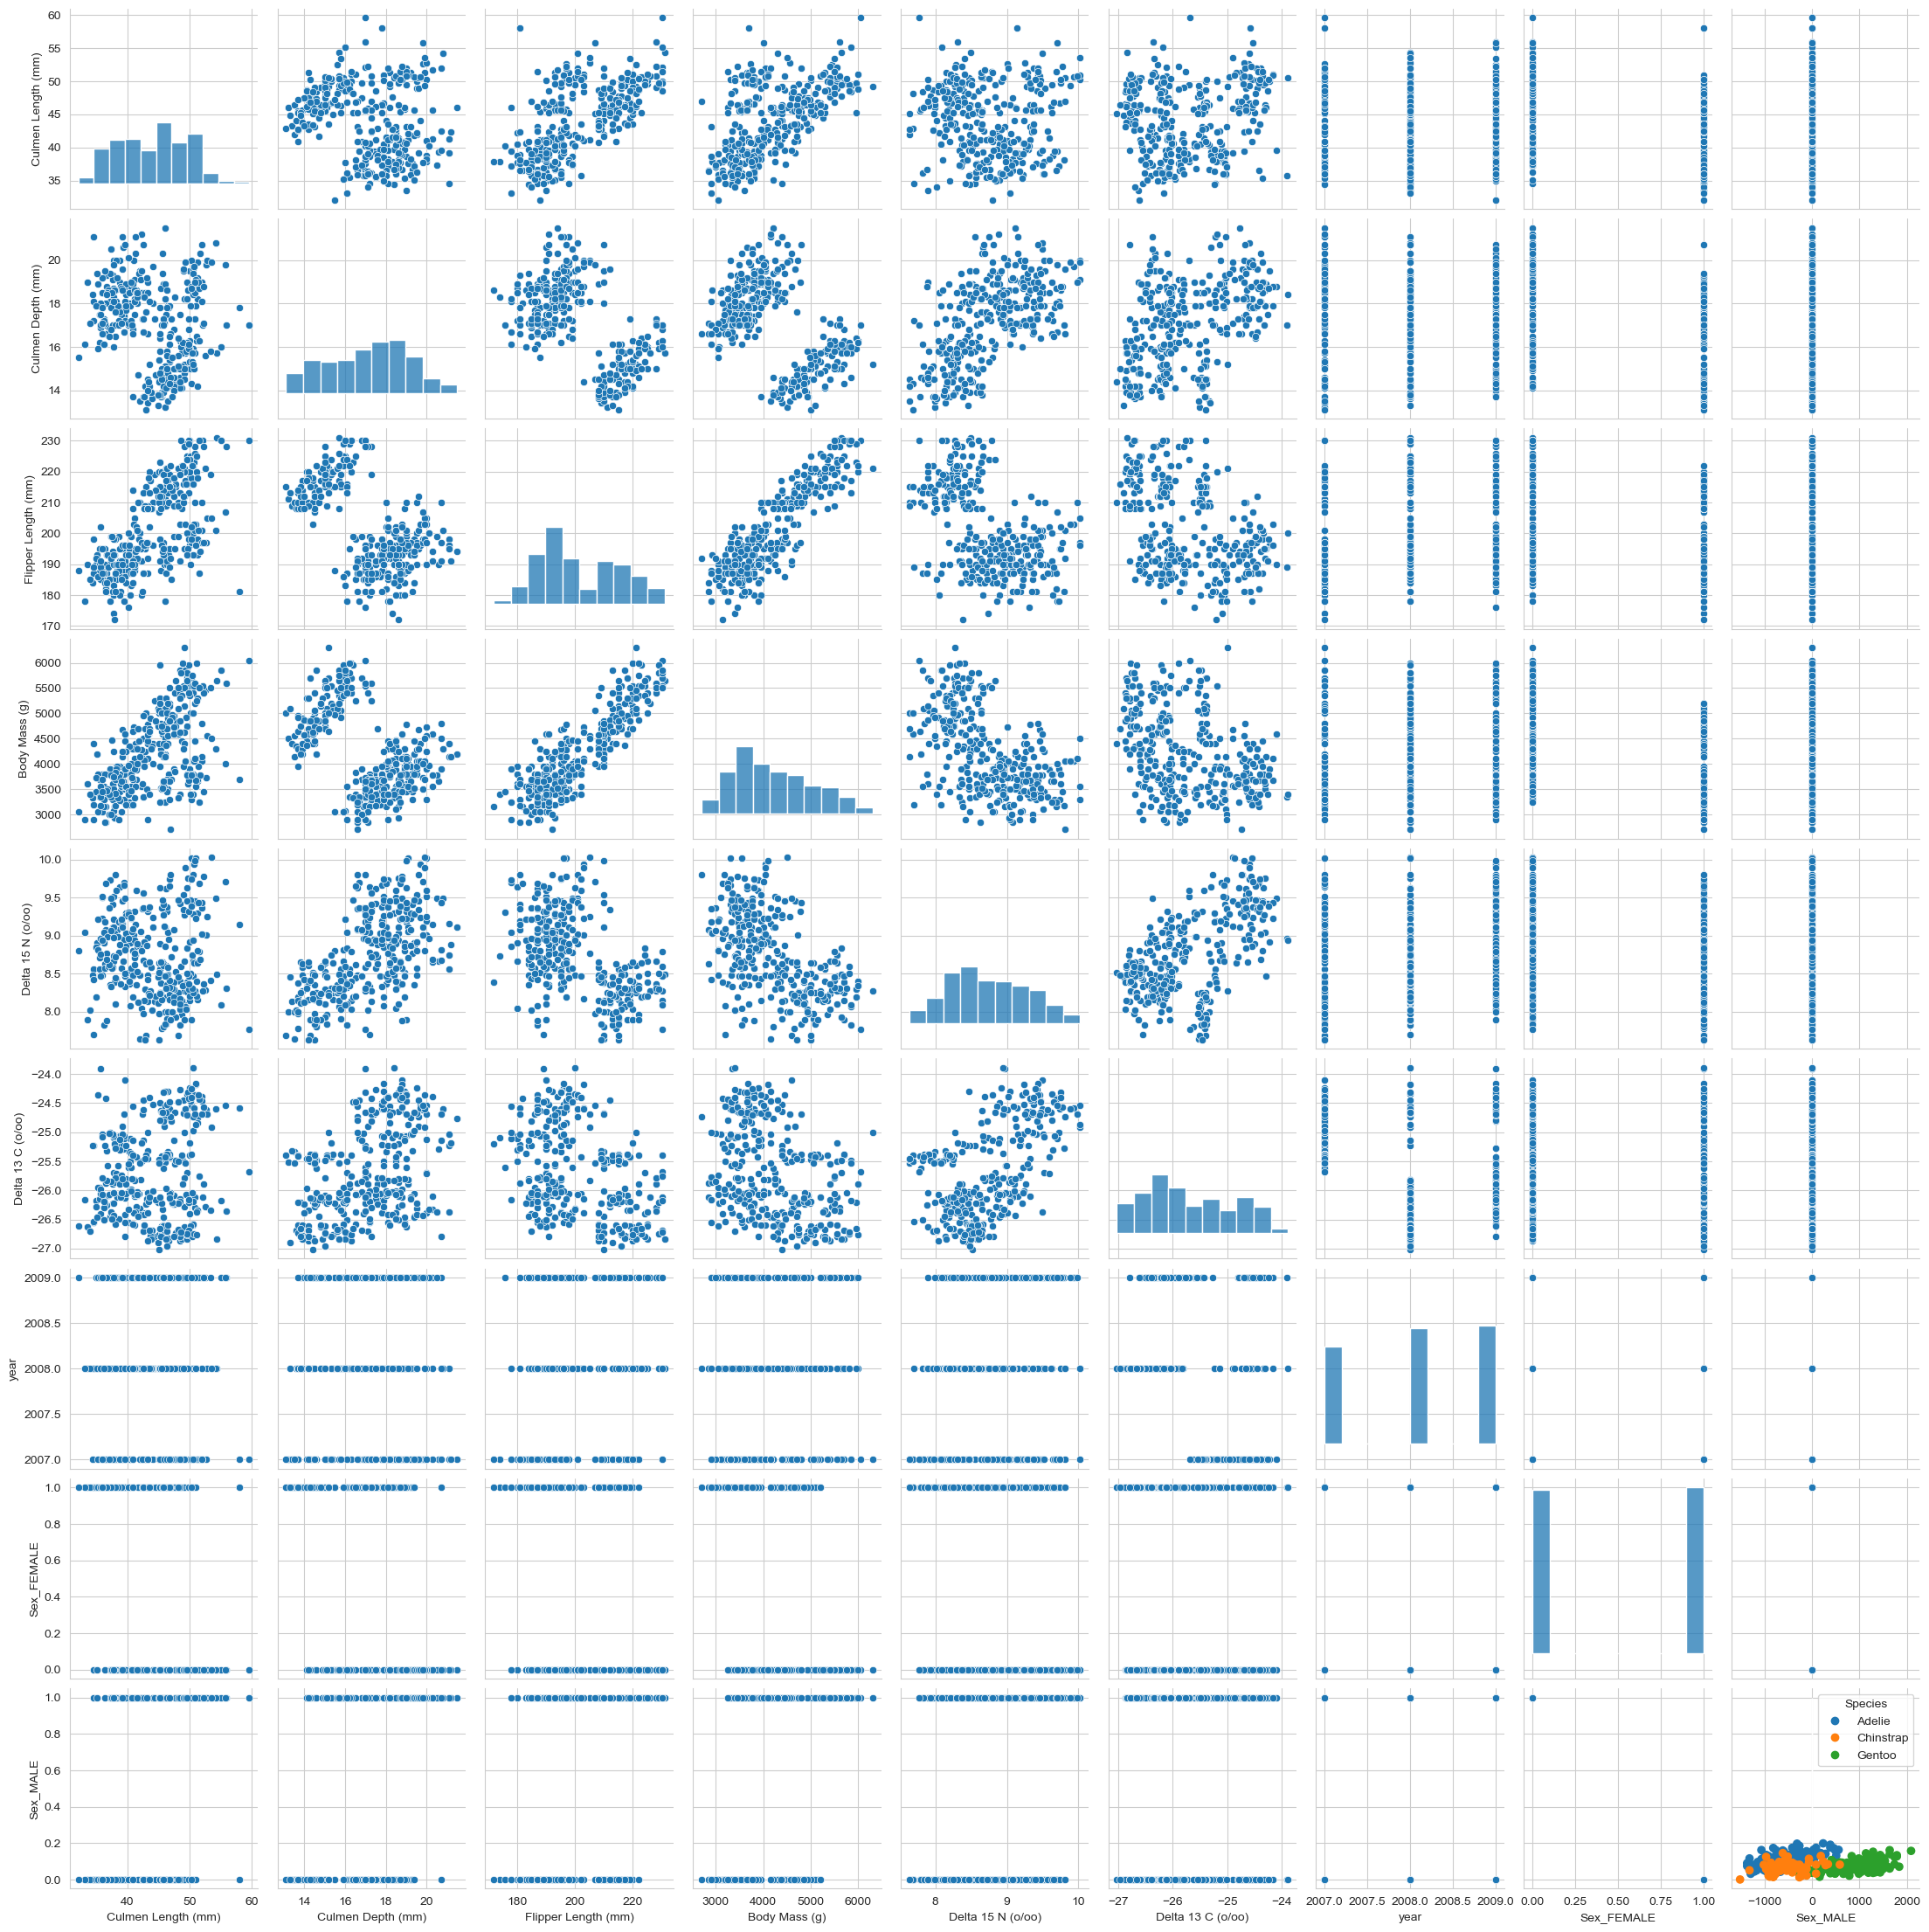

In [35]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(penguins_num)

sp_names =['Adelie','Chinstrap','Gentoo']
scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=c,cmap=cmap,norm=norm)

plt.legend(handles=scatter.legend_elements()[0], 
           labels=sp_names,
           title="Species")
plt.show()

Great! But let's plot the explained variance of the components, which is in which direction the components vary the most.

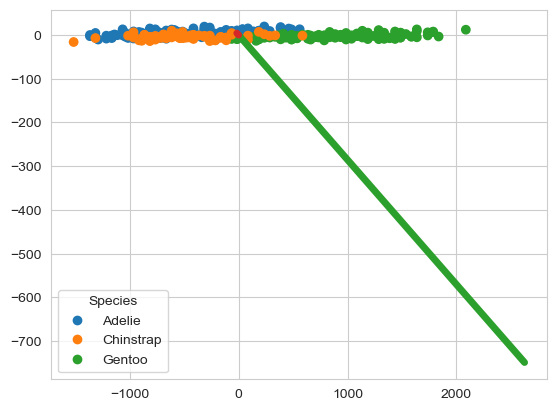

In [36]:
scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=c,cmap=cmap,norm=norm)
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.legend(handles=scatter.legend_elements()[0], 
           labels=sp_names,
           title="Species")
plt.show()

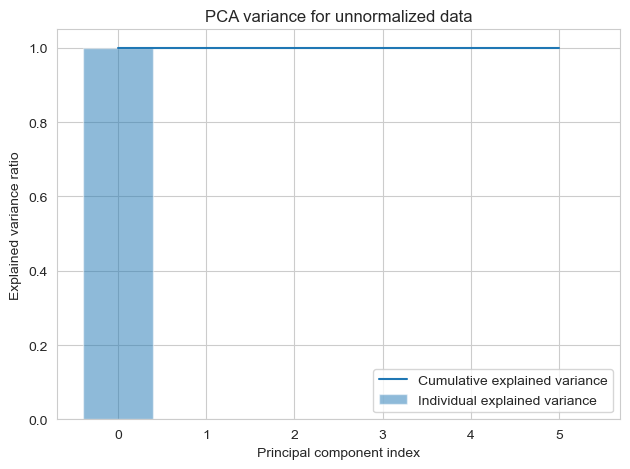

In [37]:
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(penguins_num)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title("PCA variance for unnormalized data")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

What just happened? With just one component we can explain all the variance in the dataset. Does that seems right?  
Here is the catch. PCA works with the variances, it looks for the direction of greater variance from the data. But when data is not scaled, just the attributes that have a greater unit of measure and higher values, will affect the variance. Attributes that have lower values, will not be taken into account. Therefore, we need to scale the data before applying PCA, where every attribute has 0 mean.

In [38]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [39]:
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_num)

In [40]:
penguins_scaled_dt = pd.DataFrame(penguins_scaled, columns=penguins_num.columns)

In [41]:
penguins_scaled_dt['Species'] = penguins_raw['Species']

In [42]:
sns.pairplot(penguins_scaled_dt,hue='Species')

In [43]:
c = penguins_raw['Species'].astype('category').cat.codes
colors  = [f"C{i}" for i in np.arange(0, c.max()+1)]
cmap, norm = matplotlib.colors.from_levels_and_colors(np.arange(0, c.max()+2), colors)

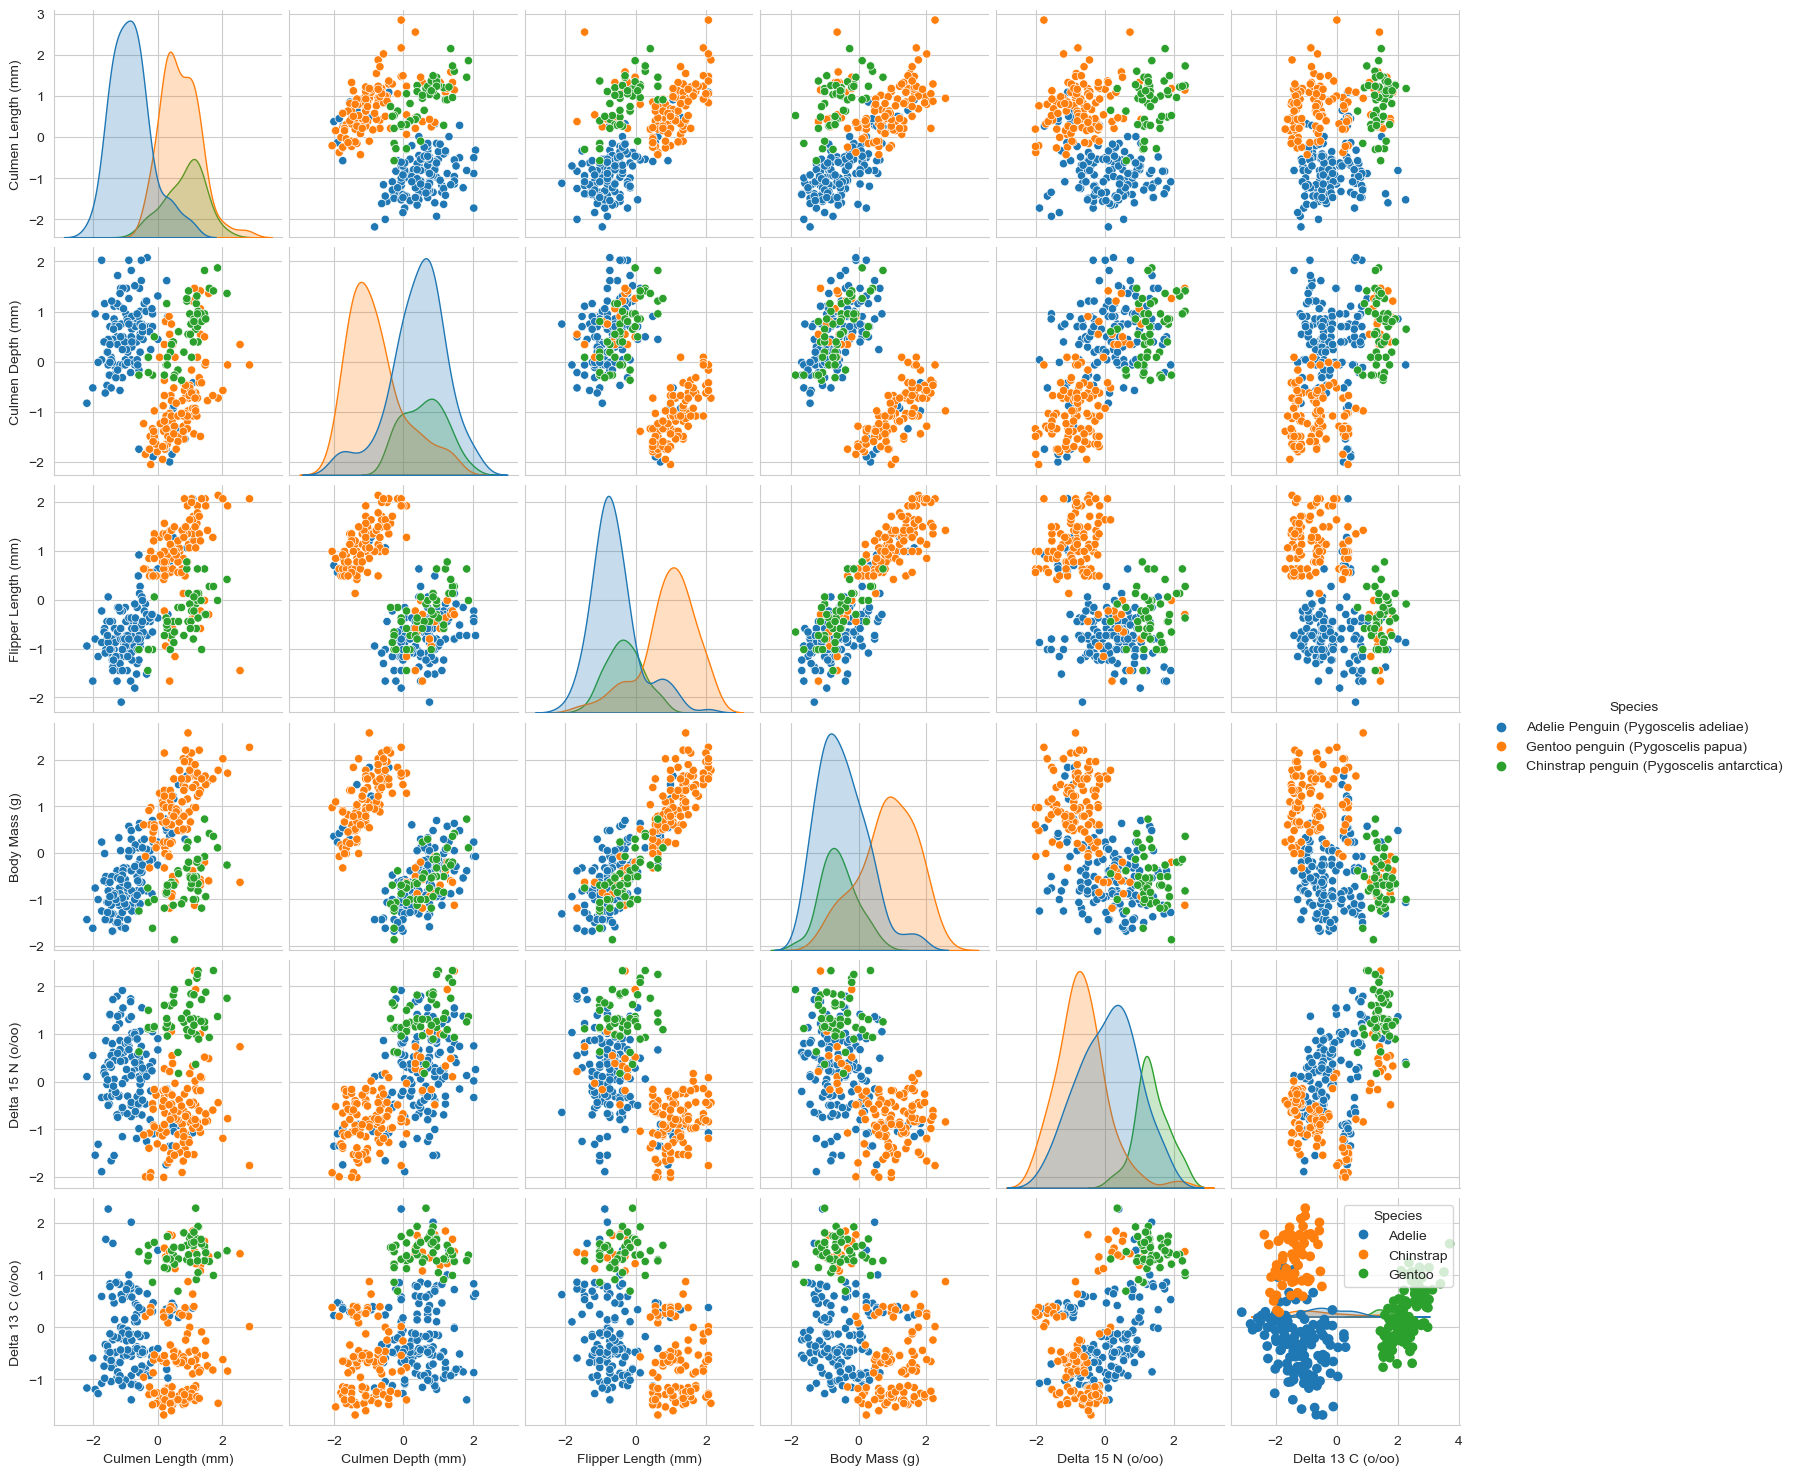

In [44]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(penguins_scaled)

sp_names =['Adelie','Chinstrap','Gentoo']
scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=c,cmap=cmap,norm=norm)
plt.legend(handles=scatter.legend_elements()[0], 
           labels=sp_names,
           title="Species")
plt.show()

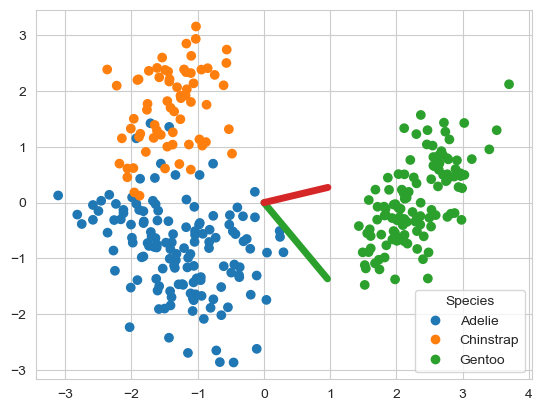

In [45]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(penguins_scaled)

sp_names =['Adelie','Chinstrap','Gentoo']
scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=c,cmap=cmap,norm=norm)
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.legend(handles=scatter.legend_elements()[0], 
           labels=sp_names,
           title="Species")
plt.show()

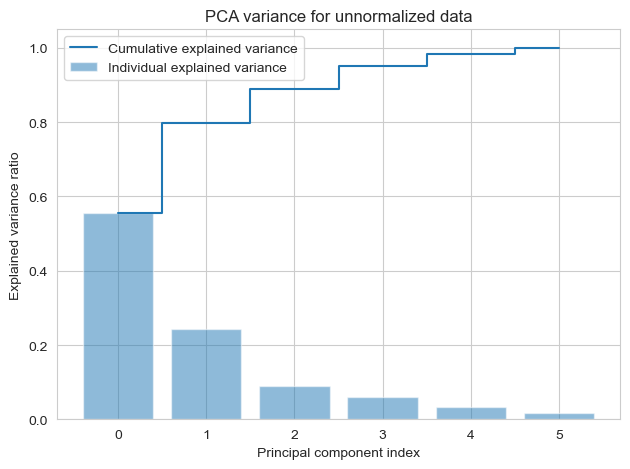

In [46]:
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(penguins_scaled)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title("PCA variance for unnormalized data")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Better right? If we do not scale the data, we might lose relevant information. With the scaled data, we see better the components after PCA, and we can see that there is a penguin species very distinctive to the other two. But more than that, we see the pattern or direction in which the data are varying the most.   

Same with the number of components. Before scaling the data, we saw that it required only one component to explain all the variance, this was not correct. Instead, we now see that we need three components to explain all the variance, basically one component less than the 4 numerical columns that we are evaluating.